In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [66]:
#pip install statsmodels

In [67]:
#pip install scikit-learn

In [68]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\Linear Regression\income.data.csv')

In [69]:
df.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [70]:
df.tail()

,Unnamed: 0,income,happiness
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664
497,498,4.530545,3.710193


In [71]:
df.columns

Index(['Unnamed: 0', 'income', 'happiness'], dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [73]:
df.shape

(498, 3)

In [74]:
df.drop(['Unnamed: 0'], axis = 1 , inplace = True)

In [75]:
df.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [76]:
df.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,498.0,4.466902,1.737527,1.506275,3.006256,4.423710,5.991913,7.481521
happiness,498.0,3.392859,1.432813,0.266044,2.265864,3.472536,4.502621,6.863388


income


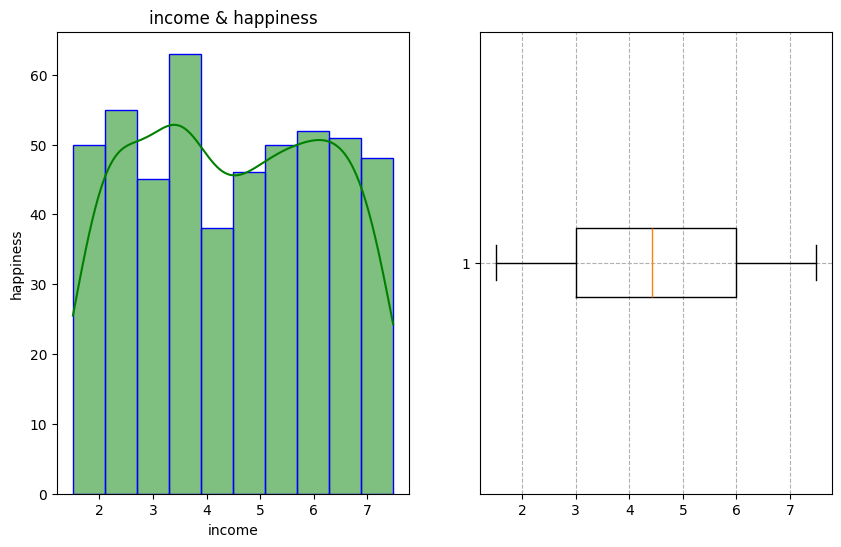

happiness


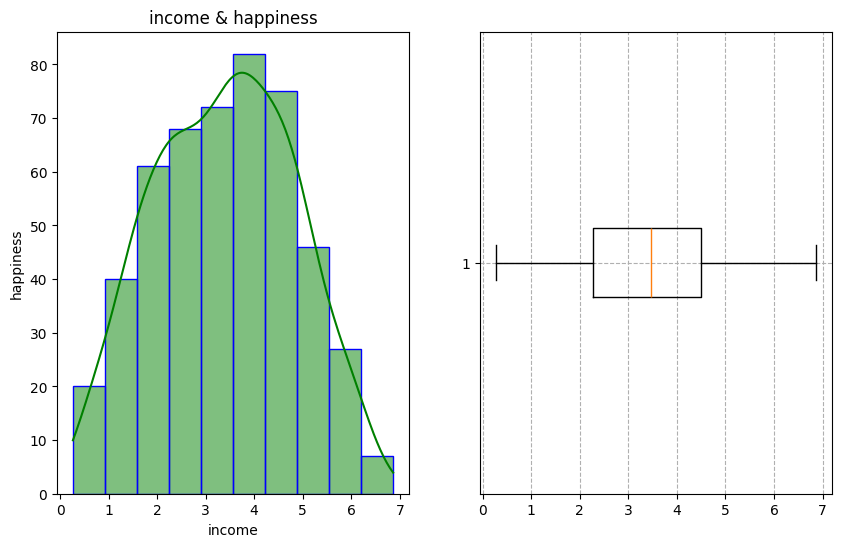

In [78]:
for i in df.columns:
    print(i)

    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    sns.histplot(df[i], bins=10, kde=True, color='green',edgecolor='blue')
    plt.title('income & happiness')
    plt.xlabel('income')
    plt.ylabel('happiness')

    plt.subplot(1,2,2)
    plt.boxplot(df[i],vert=False)

    plt.grid(True, linestyle='--' )
    plt.show()

<Axes: >

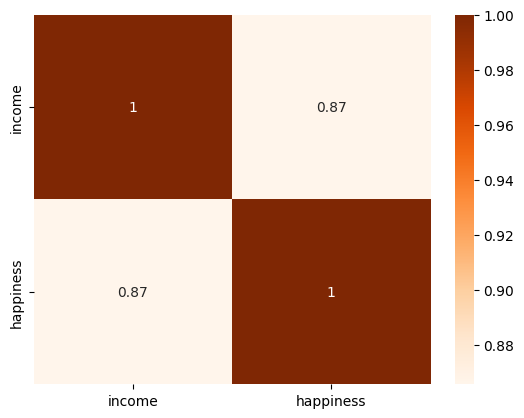

In [79]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Oranges')

In [80]:
#assuming that u have dataframe named data with columns 'income and happiness
X = df['income']
y = df['happiness']

In [81]:
#assuming you have a dataframe
X= sm.add_constant(X)
X                                       # what is this tells about

,const,income
0,1.0,3.862647
1,1.0,4.979381
2,1.0,4.923957
3,1.0,3.214372
4,1.0,7.196409
...,...,...
493,1.0,5.249209
494,1.0,3.471799
495,1.0,6.087610
496,1.0,3.440847


In [82]:
# fit the linear regression model
model = sm.OLS(y,X).fit()             #what is the ols full form and define?

In [83]:
#print the summery
print(model.summary())             #explain the summary 

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1483.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          3.96e-151
Time:                        17:42:50   Log-Likelihood:                -540.72
No. Observations:                 498   AIC:                             1085.
Df Residuals:                     496   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2043      0.089      2.299      0.0

In [84]:
df.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [85]:
y_pred = model.predict(X)
y_pred

0      2.961527
1      3.758680
2      3.719116
3      2.498771
4      5.341251
         ...   
493    3.951290
494    2.682529
495    4.549761
496    2.660435
497    3.438289
Length: 498, dtype: float64

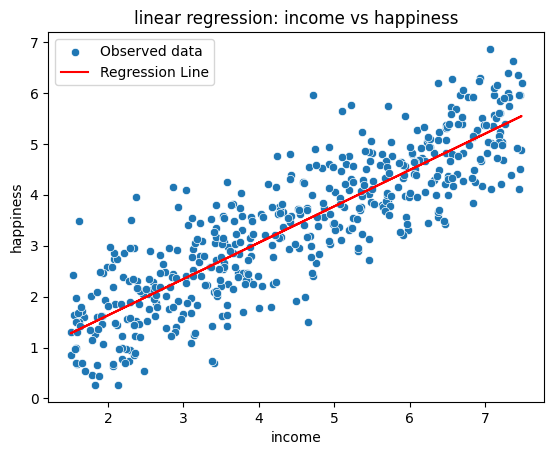

In [86]:
# scatter plot of the data points
sns.scatterplot(x='income',y='happiness',data=df,label='Observed data')

# plot the regression line
plt.plot(df['income'],y_pred,color = 'red', label='Regression Line')

#set label and title
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('linear regression: income vs happiness')

#display legend
plt.legend()

#show the plot
plt.show()

In [87]:
income = float(input('enter the income: '))
print(income)
new_data_point = [1,income]    # why we add 1 here and it's purpose
predicted_value = model.predict(new_data_point)
predicted_value[0]    # why to add 0 here and its purpose ?

7.5


np.float64(5.5579617383057345)

In [88]:
# split data into training and testing sets(80% train , 20% test)  
x_train, x_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# explain train_test_split? 

In [89]:
#initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [90]:
x_test['income']


487    4.243873
73     2.864664
231    4.223554
175    2.274523
237    2.210696
         ...   
247    5.964058
383    4.851314
19     1.994275
321    4.800344
331    6.250302
Name: income, Length: 100, dtype: float64

In [91]:
# make prediction on the test set
y_pred = model.predict(x_test)
y_pred

array([3.21752987, 2.21792257, 3.20280332, 1.79020704, 1.74394749,
       2.39018719, 4.44664262, 4.86010664, 1.89050708, 3.50456863,
       4.09833273, 2.4318678 , 2.85594355, 3.54519132, 2.78796716,
       1.80768864, 2.52124048, 5.16673969, 2.45094439, 3.996441  ,
       1.83486036, 2.72998006, 2.63135811, 1.23340488, 4.61112137,
       1.72884986, 2.46409207, 5.3782968 , 4.21884267, 4.12789401,
       1.34529138, 3.72063824, 2.83545189, 3.71043375, 4.0008309 ,
       4.01012804, 1.2713695 , 2.47646914, 1.31859325, 2.24910091,
       5.35598486, 4.42244764, 5.0893214 , 4.83614181, 2.94122983,
       2.15161714, 1.6263909 , 3.16872379, 2.67722482, 1.46401227,
       4.0291672 , 2.98869745, 5.14038236, 3.7164133 , 3.58847209,
       3.3425148 , 3.54804131, 3.94616611, 4.93059286, 3.81954393,
       4.89818897, 1.55970378, 5.09603988, 2.34495858, 2.2134292 ,
       5.38998089, 4.72238072, 3.7692388 , 2.40771063, 5.32646295,
       4.52828042, 3.42736682, 3.04261746, 3.07258943, 1.94085

In [92]:
#evaluate the model
mse = mean_squared_error (y_test,y_pred) #cost function
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_prod)# cost function

# print the evalution matrics
print ('evalution matrics:')

print(f"mean square error (mse):{mse:.4f}")
print(f"mean absolute error (mae):{mae:.4f}")      #what is 4f explain 
print(f"R-squared (R²): {r2:4f}")

evalution matrics:
mean square error (mse):0.5901
mean absolute error (mae):0.6270
R-squared (R²): 0.666259


#### **MSE**
- MSE measures the average squared difference between the actual target values and the predicted values.
- Lower values indicate better performance, but MSE is sensitive to outliers because errors are squared.

#### **MAE**
- MAE measures the average of the absolute differences between the actual and predicted values.
- lower values indicate better model performance

#### **R-squared (R²)**
- R-squared measures how well the model's predictions fit the actual data. It indicates the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

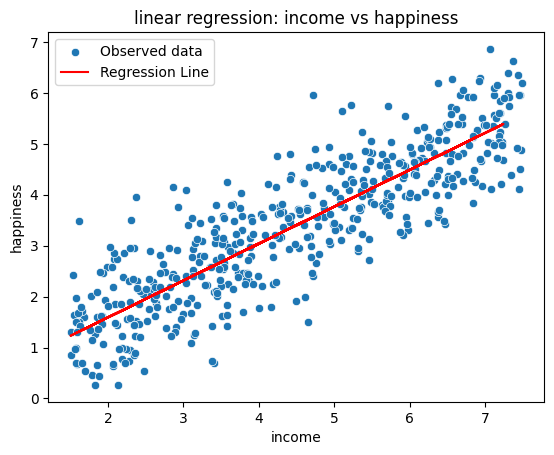

In [93]:
# scatter plot of the data points
sns.scatterplot(x='income',y='happiness',data=df,label='Observed data')

# plot the regression line
plt.plot(x_test['income'],y_pred,color = 'red', label='Regression Line')

#set label and title
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('linear regression: income vs happiness')

#display legend
plt.legend()

#show the plot
plt.show()

In [94]:
new_data = [1,7.5]
y_pred = model.predict([new_data])
print(f"predicted value: {y_pred[0]}")

predicted value: 5.577469134373413


C:\Users\KSSEEB\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
